#  Jorge BugBuster
###  This is a quick look at Jorge's ODE system for the abdo-flex model.  WHOA... be sure to use cgs system!
###  TLD -- based on Code from Jorge Bustamante 2018
###    Python modification of Matlab code.  
###    updated: 29 Nov. 2018
###   and updated again April 2019

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
import matplotlib.pylab as pylab
# forces plots to appear in the ipython notebook
#%matplotlib inline|
from scipy.integrate import odeint
from pylab import plot,xlabel,ylabel,title,legend,figure,subplots
import random
import time
from pylab import cos, pi, arange, sqrt, pi, array
import sys

In [2]:
sys.executable
sys.version

'3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]'

In [3]:
def FlyTheBug(state,t):
    # unpack the state vector
    x,xd,y,yd,theta,thetad,phi,phid = state # displacement,x and velocity xd  etc...   You got it?'
    # compute acceleration xdd = x''
    # Jorge's order .  x,y,theta,phi,xd,yd,thetad,phid
    # .  there is no entry for Q(2) ... which would be y.  I wonder why not?

    #Reynolds number calculation:
    Re_head = rhoA*(np.sqrt((xd**2)+(yd**2)))*(2*bhead)/muA; #dimensionless number
    Re_butt = rhoA*(np.sqrt((xd**2)+(yd**2)))*(2*bbutt)/muA; #dimensionless number

    #Coefficient of drag stuff:
    Cd_head = 24/np.abs(Re_head) + 6/(1 + np.sqrt(np.abs(Re_head))) + 0.4;
    Cd_butt = 24/np.abs(Re_butt) + 6/(1 + np.sqrt(np.abs(Re_butt))) + 0.4;
    
    h1 = m1 + m2;
    h2 = (-1)*L1*m1*np.sin(theta);
    h3 = (-1)*L2*m2*np.sin(phi);
    h4 = L1*m1*np.cos(theta);
    h5 = L2*m2*np.cos(phi);
    h6 = (-1)*F*np.cos(alpha+theta)+(1/2)*Cd_butt*rhoA*S_butt*np.abs(xd)*xd+(1/2)*Cd_head*rhoA*S_head*np.abs(xd)*xd+(-1)*L1*m1*np.cos(theta)*thetad**2+(-1)*L2*m2*np.cos(phi)*phid**2
    h7 = g*(m1+m2)+(1/2)*Cd_butt*rhoA*S_butt*np.abs(yd)*yd+(1/2)*Cd_head*rhoA*S_head*np.abs(yd)*yd+(-1)*L1*m1*thetad**2*np.sin(theta)+(-1)*F*np.sin(alpha+theta)+(-1)*L2*m2*phid**2*np.sin(phi);
    h8 = (-1)*tau0+g*L1*m1*np.cos(theta)+(-1)*K*((-1)*betaR+(-1)*pi+(-1)*theta+phi)+(-1)*c*((-1)*thetad+phid)+(-1)*F*L3*np.sin(alpha);
    h9 = tau0+g*L2*m2*np.cos(phi)+K*((-1)*betaR+(-1)*pi+(-1)*theta+phi)+c*((-1)*thetad+phid);
    h10 = I1+L1**2*m1
    h11 = I2+L2**2*m2


    xdd = (-1)*(h10*h11*h1**2+(-1)*h11*h1*h2**2+(-1)*h10*h1*h3**2+(-1)*h11*h1*h4**2+h3**2*h4**2+(-2)*h2* 
        h3*h4*h5+(-1)*h10*h1*h5**2+h2**2*h5**2)**(-1)*( 
        h10*h11*h1*h6+(-1)*h11*h4**2*h6+(-1)*h10*h5**2* 
        h6+h11*h2*h4*h7+h10*h3*h5*h7+(-1)*h11*h1*h2* 
        h8+(-1)*h3*h4*h5*h8+h2*h5**2*h8+(-1)*h10*h1* 
        h3*h9+h3*h4**2*h9+(-1)*h2*h4*h5*h9)
  

    ydd = (-1)*((-1)*h10*h11*h1**2+h11*h1*h2**2+h10*h1*
        h3**2+h11*h1*h4**2+(-1)*h3**2*h4**2+2*h2*h3*h4*
        h5+h10*h1*h5**2+(-1)*h2**2*h5**2)**(-1)*((-1)*h11*
        h2*h4*h6+(-1)*h10*h3*h5*h6+(-1)*h10*h11*h1*
        h7+h11*h2**2*h7+h10*h3**2*h7+h11*h1*h4*h8+(-1)*
        h3**2*h4*h8+h2*h3*h5*h8+h2*h3*h4*h9+h10*h1*
        h5*h9+(-1)*h2**2*h5*h9)

    thetadd = (-1)*((-1)*h10*h11*h1**2+h11*h1*h2**2+h10*h1*
        h3**2+h11*h1*h4**2+(-1)*h3**2*h4**2+2*h2*h3*h4*
        h5+h10*h1*h5**2+(-1)*h2**2*h5**2)**(-1)*(h11*h1*
        h2*h6+h3*h4*h5*h6+(-1)*h2*h5**2*h6+h11*h1*
        h4*h7+(-1)*h3**2*h4*h7+h2*h3*h5*h7+(-1)*h11*
        h1**2*h8+h1*h3**2*h8+h1*h5**2*h8+(-1)*h1*h2*
        h3*h9+(-1)*h1*h4*h5*h9);

    phidd = (-1)*((-1)*h10*h11*h1**2+h11*h1*h2**2+h10*h1*
        h3**2+h11*h1*h4**2+(-1)*h3**2*h4**2+2*h2*h3*h4*
        h5+h10*h1*h5**2+(-1)*h2**2*h5**2)**(-1)*(h10*h1*
        h3*h6+(-1)*h3*h4**2*h6+h2*h4*h5*h6+h2*h3*h4*
        h7+h10*h1*h5*h7+(-1)*h2**2*h5*h7+(-1)*h1*h2*
        h3*h8+(-1)*h1*h4*h5*h8+(-1)*h10*h1**2*h9+h1*
        h2**2*h9+h1*h4**2*h9)
    
    return [xd, xdd,yd,ydd,thetad,thetadd,phid,phidd]

In [4]:
# Bunches of parameters ...  these don't vary from run to run 
#masses and moment of inertias in terms of insect density and eccentricity
#of the head/thorax & gaster
# oh.. and I'm offline -- so I just made up a bunch of numbers.

bhead = 0.507
ahead = 0.908
bbutt  = 0.1295
abutt  = 1.7475
rho = 1  #cgs  density of insect 
rhoA = 0.00118  #cgs density of air
muA = 0.000186 #cgs viscosity
L1 = 0.908     #Length from the thorax-abdomen joint to the center of the 
    #head-thorax mass in cm
L2 = 1.7475   #Length from the thorax-abdomen joint to the center of the 
    #abdomen mass in cm
L3 = 0.75   #Length from the thorax-abdomen joint to the aerodynamic force 
    #vector in cm
m1 = rho*(4/3)*pi*(bhead**2)*ahead; #m1 is the mass of the head-thorax
m2 = rho*(4/3)*pi*(bbutt**2)*abutt; #m2 is the mass of the abdomen 
    #(petiole + gaster)
echead = ahead/bhead; #Eccentricity of head-thorax (unitless)
ecbutt = abutt/bbutt; #Eccentricity of gaster (unitless)
I1 = (1/5)*m1*(bhead**2)*(1 + echead**2); #Moment of inertia of the 
    #head-thorax
I2 = (1/5)*m2*(bbutt**2)*(1 + ecbutt**2); #Moment of inertia of the gaster

S_head = pi*bhead**2; #This is the surface area of the object experiencing drag.
                #In this case, it is modeled as a sphere.
S_butt = pi*bbutt**2; #This is the surface area of the object experiencing drag.
                #In this case, it is modeled as a sphere.

K = 29.3  #K is the torsional spring constant of the thorax-petiole joint
    #in (cm^2)*g/(rad*(s^2))
c =  14075.8   #c is the torsional damping constant of the thorax-petiole joint
    #in (cm^2)*g/s
g =  980.0   #g is the acceleration due to gravity in cm/(s^2)
betaR =  0.0 #This is the resting configuration of our 
    #torsional spring(s) = Initial abdomen angle - initial head angle - pi
    

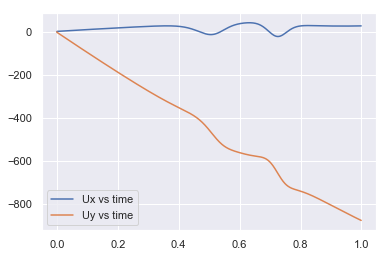

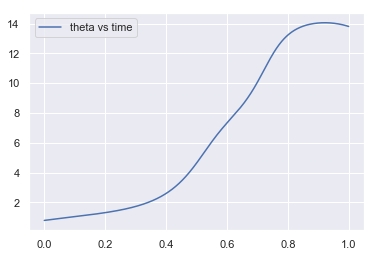

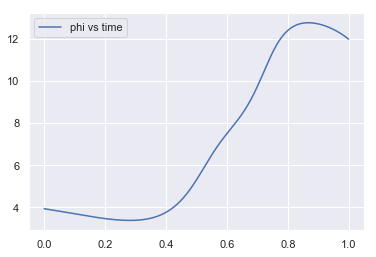

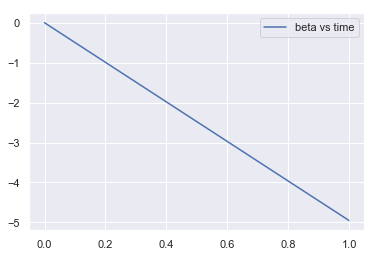

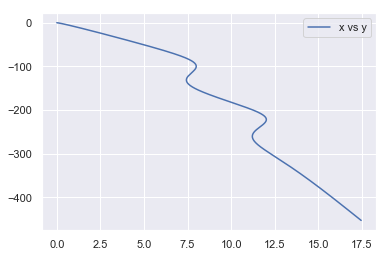

In [6]:
#This cell just checks to be sure we can run this puppy and graph results. 
state0 = [0.0, 0.0001, 0.0, 0.0001, np.pi/4, 0.0, np.pi/4 + np.pi, 0.0]  #initial conditions [x0 , v0  etc0 ]
F =  40462.5  # . CAUTION .. .I just set this to zero.
# By the way --if you give this an initial kick and keep the force low, it has a nice parabolic trajectory
alpha = 5.75
tau0 = 69825.
ti = 0.0  # initial time
tf = 1.0  # final time
nstep = 1000
step = (tf-ti)/nstep  # step
t = arange(ti, tf, step)
state = odeint(FlyTheBug, state0, t)
x = array(state[:,[0]])
xd = array(state[:,[1]])
y = array(state[:,[2]])
yd = array(state[:,[3]])
theta = array(state[:,[4]])
thetad = array(state[:,[5]])
phi = array(state[:,[6]])
phid = array(state[:,[7]])
#  And let's just plot it all
sb.set()
plt.figure()
plt.plot(t,xd, label = 'Ux vs time')
plt.plot(t,yd, label = 'Uy vs time')
plt.legend()
plt.figure()
plt.plot(t,theta, label = 'theta vs time')
plt.legend()
plt.figure()
plt.plot(t,phi, label = 'phi vs time')
plt.legend()
plt.figure()
plt.plot(t, phi - theta - pi, label = 'beta vs time')
plt.legend()
plt.figure()
plt.plot(x,y, label = 'x vs y')
plt.legend()


In [6]:
print(x[99])
print(y[99])
print(theta[99])

[73.32767093]
[-35.91191047]
[-6.38224107]


In [ ]:
#   This cell just tests the random assignmnent of forces and plots the result in the next cell
tic = time.time()
ti = 0.0  # initial time  
tf = 0.02  # final time  
nstep = 100   # number of time steps.
step = (tf-ti)/nstep  # duration of the time step
t = arange(ti, tf, step)  # how much time
nrun = 100  #number of trajectories.
x = [[0 for x in range(nrun)] for y in range(nstep)] # initialize the matrix of locations
xd = [[0 for x in range(nrun)] for y in range(nstep)]
y = [[0 for x in range(nrun)] for y in range(nstep)] 
yd = [[0 for x in range(nrun)] for y in range(nstep)] 
theta = [[0 for x in range(nrun)] for y in range(nstep)] 
thetad = [[0 for x in range(nrun)] for y in range(nstep)] 
phi = [[0 for x in range(nrun)] for y in range(nstep)] 
phid = [[0 for x in range(nrun)] for y in range(nstep)] 
state0 = [0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0]  #initial conditions [x0 , v0  etc0 ]
for i in range(0,nrun):
    r = random.random()-0.5  # random number between -0.5 and 0.5
    F = r*100000
    # By the way --if you give this an initial kick and keep the force low, it has a nice parabolic trajectory
    r = random.random()-0.5
    alpha = r*np.pi
    r = random.random()-0.5
    tau0 = r*100
    state = odeint(FlyTheBug, state0, t)
    x[i][:] = array(state[:,[0]])
    xd[i][:] = array(state[:,[1]])
    y[i][:] = array(state[:,[2]])
    yd[i][:] = array(state[:,[3]])
    theta[i][:] = array(state[:,[4]])
    thetad[i][:] = array(state[:,[5]])
    phi[i][:] = array(state[:,[6]])
    phid[i][:] = array(state[:,[7]])
print('elapsed time = ',time.time()-tic)

In [ ]:
plt.figure()
for i in range(0,nrun):
    plt.plot(x[i][:],y[i][:], label = 'trajectory x vs y')

In [ ]:
# There are two forks in the road
#    One is to select myriad random ICs and and myriad random Forces/ Torques..  then learn.
#    The other fork generates a tracking beahvior using MPC with MC.   In the latter, we want to specify a trajectory
print(x[:][nstep-1])

In [ ]:
#%Weighting coefficients from Jorge ... hope they're the recent ones.
#%c1 = xdot, c2 = ydot, c3 = thetadot, c4 = x, c5 = y, c6 = theta
#c1 = 1*10^-5; c2 = 1*10^-5; c3 = 10^6; c4 = 10^7; c5 = 10^8; c6 = 10^10; 
CostWeights = [10**7,10**-5,10**8,10**-5,10^10,10^6,0,0]
#EndState = [x[:][nstep-1],xd[:][nstep-1]],y[:][nstep-1],yd[:][nstep-1],theta[:][nstep-1],thetad[:][nstep-1],phi[:][nstep-1],phid[:][nstep-1]
Goal = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
print(np.dot(CostWeights,np.abs(EndState - Goal)))

In [ ]:
import multiprocessing
multiprocessing.cpu_count()